In [1]:
from credentials import token

In [2]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer, plot_histogram

In [3]:
class Circuit:
    def __init__(self, secret):
        self.input = QuantumRegister(4)
        self.temp = QuantumRegister(1)
        self.result = ClassicalRegister(4)
        self.secret = secret
        
        self.circuit = QuantumCircuit(self.input, self.temp, self.result)
        self.circuit.x(self.temp[0])
        self.circuit.h(self.input)
        self.circuit.h(self.temp)
        self.circuit += self.oracle()
        self.circuit.h(self.input)
        self.circuit.h(self.temp)
        self.circuit.measure(self.input, self.result)
    
    def oracle(self):
        o = QuantumCircuit(self.input, self.temp, self.result)
        for i in range(len(self.input)):
            if(self.secret & (1 << i)):
                o.cx(self.input[i], self.temp[0])
        
        return o

In [4]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.11.0',
 'qiskit-terra': '0.8.2',
 'qiskit-ignis': '0.1.1',
 'qiskit-aer': '0.2.3',
 'qiskit-ibmq-provider': '0.3.0',
 'qiskit-aqua': '0.5.2'}

In [5]:
from qiskit import IBMQ
IBMQ.save_account(token)

/usr/local/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [6]:
from qiskit import Aer, execute

In [7]:
provider = IBMQ.load_account()

In [8]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
backend = provider.get_backend('ibmqx2')

In [10]:
bv = Circuit(12)

In [11]:
circuit_drawer(bv.circuit)

In [12]:
result = execute(bv.circuit, backend).result()

In [13]:
counts = result.get_counts()

In [14]:
counts

{'1100': 727,
 '0101': 2,
 '0000': 27,
 '0110': 5,
 '1000': 128,
 '1110': 16,
 '1001': 3,
 '1011': 1,
 '1010': 3,
 '0100': 98,
 '1101': 14}

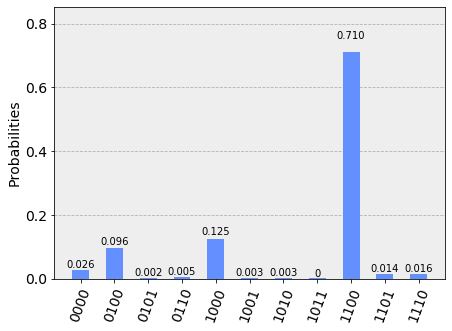

In [15]:
plot_histogram(counts)

In [16]:
int(max(counts, key=counts.get), 2)

12